# Natural Language Processing
[Slides](https://docs.google.com/presentation/d/1n0sppuB6w4ow2y3enpakBRs4sVLUteTRIDpcP4IUnG0/edit?usp=sharing)

## Imports

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from keras.datasets import imdb

from keras.preprocessing.text import Tokenizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

## 20 News Groups

In [0]:
news = fetch_20newsgroups()

In [0]:
X = news.data
y = news.target

In [0]:
print(X[0])
print("###############")
print(X[1])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





###############
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-H

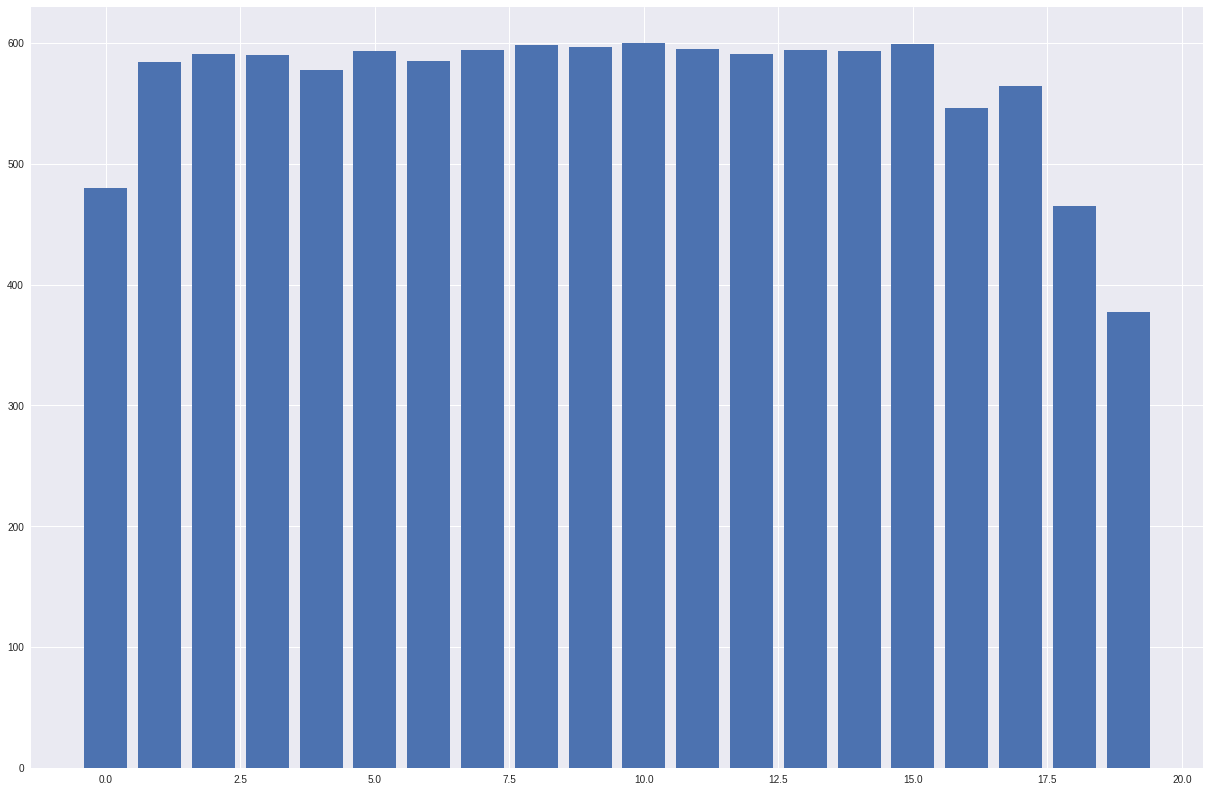

In [0]:
plt.bar(np.arange(len(np.unique(y))), np.unique(y, return_counts=True)[1])
plt.gcf().set_size_inches(21, 14)

## Text Preprocessing

Text data can come in different shapes and sizes. To 'normalize' the data to make it more usable in our models we need to clean it by removing punctuation, link, removing duplicate spaces, removing newline characters, make everything lowercase.


Check this article for more information:
 - https://machinelearningmastery.com/clean-text-machine-learning-python/
 

In [0]:
import re
import nltk
import string

def clean(text):
    text = re.sub('<[^<]+?>', ' ', text)
 
    text = text.replace('\\"', '')
 
    text = text.replace('\n', ' ')
  
    text = text.replace('\t', ' ')

    text = text.replace('"', '')
      
    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(' +', ' ', text)
    
    text = re.sub('\d+', '0', text)
    
    text = text.lower()
    
    
    return text

In [0]:
clean(X[0])

'from lerxstwamumdedu wheres my thing subject what car is this nntppostinghost rac0wamumdedu organization university of maryland college park lines 0 i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 0door sports car looked to be from the late 0s early 0s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please email thanks il brought to you by your neighborhood lerxst '

# Bag of Words

Bag of words model is a way to encode each of our documents as a set of numbers. These numbers represent if a word from the vocabulary is present in the document or not.

Check these links to find out more:
- https://machinelearningmastery.com/gentle-introduction-bag-words-model/
- https://medium.com/greyatom/an-introduction-to-bag-of-words-in-nlp-ac967d43b428


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), min_df=3, max_features=100)

X_train_onehot = vectorizer.fit_transform([clean(x) for x in X]).todense()


In [0]:
X_train_onehot.shape

(11314, 100)

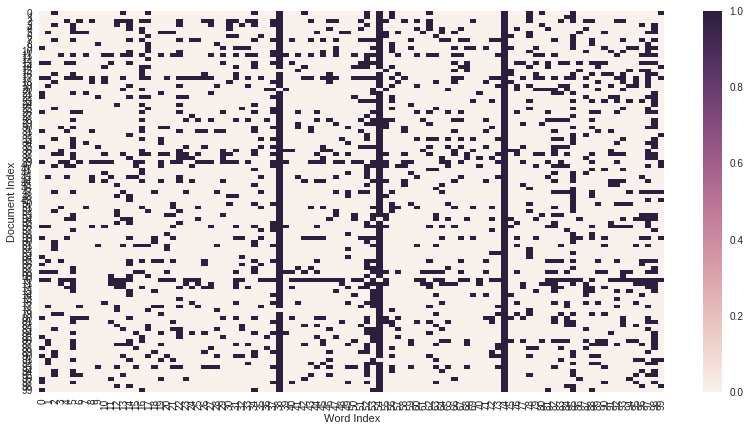

In [0]:
sns.heatmap(X_train_onehot[:100, :])

ax = plt.gca()

ax.set_xlabel('Word Index')
ax.set_ylabel('Document Index')

plt.gcf().set_size_inches(14, 7)

This image is a showing for a particular document (y axis), what words appear in it. Only "important" words are taken into account, that have the highest term frequency.



## Feed-Forward Neural Network on Bag of Words

In [0]:
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), max_features=5000)
X_train_onehot = vectorizer.fit_transform([clean(x) for x in X]).todense()

x_train, x_test, y_train, y_test = train_test_split(X_train_onehot, y, random_state=42)

In [0]:
x_train.shape, y_train.shape

((8485, 5000), (8485,))

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(len(np.unique(y)), activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320064    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                660       
Total params: 322,804
Trainable params: 322,804
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 2s 271us/step - loss: 1.6421 - acc: 0.6011 - val_loss: 0.7200 - val_acc: 0.8409
Epoch 2/5
8485/8485 [==============================] - 1s 171us/step - loss: 0.3971 - acc: 0.9160 - val_loss: 0.5396 - val_acc: 0.8498
Epoch 3/5
8485/8485 [==============================] - 1s 172us/step - loss: 0.1583 - acc: 0.9749 - val_loss: 0.5156 - val_acc: 0.8568
Epoch 4/5
8485/8485 [==============================] - 1s 171us/step - loss: 0.0720 - acc: 0.9932 - val_loss: 0.5257 - val_acc: 0.8646
Epoch 5/5
8485/8485 [==============================] - 1s 173us/step - loss: 0.0375 - acc: 0.9981 - val_loss: 0.5419 - val_acc: 0.8607


The network is overfitting. What can we do to prevent this?

## Feed-Forward Neural Network with Tfidf

Tf-idf (term frequency - inverse term frequency) is another way to encode our documents, but takes into account frequent words and infrequent words. 

Single-page tutorial: 
 - http://www.tfidf.com/

Check out this plot to understand more about the intuition:

![](https://cdn-images-1.medium.com/max/1200/1*_OsV8gO2cjy9qcFhrtCdiw.jpeg)

In [0]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=100)

In [0]:
X_train_tfidf = vectorizer.fit_transform([clean(x) for x in X]).todense()

In [0]:
X_train_tfidf.shape

(11314, 100)

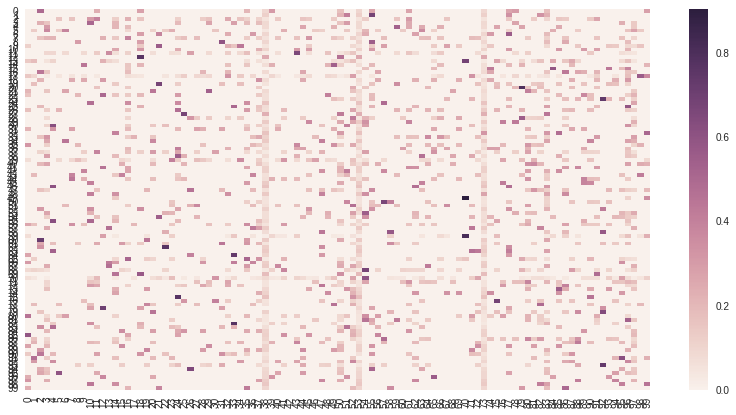

In [0]:
sns.heatmap(X_train_tfidf[:100, :])

plt.gcf().set_size_inches(14, 7)

In [0]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X_train_tfidf = vectorizer.fit_transform([clean(x) for x in X]).todense()


model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(5000, ), activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(len(np.unique(y)), activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_tfidf, y, epochs=5, validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/5
9051/9051 [==============================] - 2s 193us/step - loss: 2.0897 - acc: 0.5071 - val_loss: 1.0542 - val_acc: 0.8118
Epoch 2/5
9051/9051 [==============================] - 1s 165us/step - loss: 0.6119 - acc: 0.8774 - val_loss: 0.5854 - val_acc: 0.8418
Epoch 3/5
9051/9051 [==============================] - 2s 167us/step - loss: 0.2698 - acc: 0.9463 - val_loss: 0.4870 - val_acc: 0.8630
Epoch 4/5
9051/9051 [==============================] - 2s 166us/step - loss: 0.1381 - acc: 0.9794 - val_loss: 0.4626 - val_acc: 0.8732
Epoch 5/5
9051/9051 [==============================] - 2s 166us/step - loss: 0.0725 - acc: 0.9925 - val_loss: 0.4674 - val_acc: 0.8705


## Calculating similarity between documents

![](https://cdn-images-1.medium.com/max/800/0*XMW5mf81LSHodnTi.png)

In [0]:
docs = [X[i] for i in np.argwhere(y == 0).ravel()]

doc_vector = vectorizer.transform([clean(docs[0])])
doc_vector2 = vectorizer.transform([clean(docs[1])])

print(docs[0])
print('#########################')
print(docs[1])

print(cosine_similarity(doc_vector.reshape(1, -1), doc_vector2.reshape(1, -1)))



From: mathew <mathew@mantis.co.uk>
Subject: Re: <Political Atheists?
Organization: Mantis Consultants, Cambridge. UK.
X-Newsreader: rusnews v1.01
Lines: 22

kmr4@po.CWRU.edu (Keith M. Ryan) writes:
> ( I am almost sure that Zyklon-B is immediate and painless method of 
> death. If not, insert soem other form. )
> 
>         And, ethnic and minority groups have been killed, mutilated and 
> exterminated through out history, so I guess it was not unusual.
> 
>         So, you would agree that the holocost would be allowed under the US 
> Constitution?  [ in so far, the punishment. I doubt they recieved what would 
> be considered a "fair" trial by US standards.

Don't be so sure.  Look what happened to Japanese citizens in the US during
World War II.  If you're prepared to say "Let's round these people up and
stick them in a concentration camp without trial", it's only a short step to
gassing them without trial.  After all, it seems that the Nazis originally
only intended to imprison the

In [0]:
docs = [X[i] for i in np.argwhere(y == 0).ravel()]
docs2 = [X[i] for i in np.argwhere(y == 1).ravel()]

doc_vector = vectorizer.transform([clean(docs[0])])
doc_vector2 = vectorizer.transform([clean(docs2[0])])

print(docs[0])
print('#########################')
print(docs2[0])

print(cosine_similarity(doc_vector.reshape(1, -1), doc_vector2.reshape(1, -1)))

From: mathew <mathew@mantis.co.uk>
Subject: Re: <Political Atheists?
Organization: Mantis Consultants, Cambridge. UK.
X-Newsreader: rusnews v1.01
Lines: 22

kmr4@po.CWRU.edu (Keith M. Ryan) writes:
> ( I am almost sure that Zyklon-B is immediate and painless method of 
> death. If not, insert soem other form. )
> 
>         And, ethnic and minority groups have been killed, mutilated and 
> exterminated through out history, so I guess it was not unusual.
> 
>         So, you would agree that the holocost would be allowed under the US 
> Constitution?  [ in so far, the punishment. I doubt they recieved what would 
> be considered a "fair" trial by US standards.

Don't be so sure.  Look what happened to Japanese citizens in the US during
World War II.  If you're prepared to say "Let's round these people up and
stick them in a concentration camp without trial", it's only a short step to
gassing them without trial.  After all, it seems that the Nazis originally
only intended to imprison the

### TfIdf only captures syntactic information (occurance of words). Similarity using tfidf between documents is only concerned what words are present, with no semantic meaning.

# Word Embeddings

If we wish to capture some semantic information, we must resort to word embeddings like Word2Vec. These embeddings are learned through a neural network such that they capture information about the relation between words. 

- https://www.tensorflow.org/tutorials/representation/word2vec
- https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

In [0]:
import gensim

import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [0]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [0]:
cleaned_text = [clean(x).split() for x in X]

In [0]:
w2v_model.build_vocab(cleaned_text, progress_per=1000)

INFO - 09:47:14: collecting all words and their counts
INFO - 09:47:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 09:47:15: PROGRESS: at sentence #1000, processed 265543 words, keeping 26914 word types
INFO - 09:47:15: PROGRESS: at sentence #2000, processed 534919 words, keeping 44051 word types
INFO - 09:47:15: PROGRESS: at sentence #3000, processed 794024 words, keeping 53664 word types
INFO - 09:47:15: PROGRESS: at sentence #4000, processed 1106096 words, keeping 64481 word types
INFO - 09:47:15: PROGRESS: at sentence #5000, processed 1395648 words, keeping 75122 word types
INFO - 09:47:15: PROGRESS: at sentence #6000, processed 1674088 words, keeping 83187 word types
INFO - 09:47:15: PROGRESS: at sentence #7000, processed 1960433 words, keeping 90395 word types
INFO - 09:47:15: PROGRESS: at sentence #8000, processed 2240694 words, keeping 96466 word types
INFO - 09:47:15: PROGRESS: at sentence #9000, processed 2487059 words, keeping 102263 word types


In [0]:
w2v_model.train(cleaned_text, total_examples=w2v_model.corpus_count, epochs=1, report_delay=1)

INFO - 09:47:16: training model with 3 workers on 10024 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 09:47:17: EPOCH 1 - PROGRESS: at 14.88% examples, 184661 words/s, in_qsize 5, out_qsize 0
INFO - 09:47:18: EPOCH 1 - PROGRESS: at 30.76% examples, 189007 words/s, in_qsize 5, out_qsize 0
INFO - 09:47:19: EPOCH 1 - PROGRESS: at 45.74% examples, 192211 words/s, in_qsize 5, out_qsize 0
INFO - 09:47:20: EPOCH 1 - PROGRESS: at 61.08% examples, 191764 words/s, in_qsize 5, out_qsize 0
INFO - 09:47:21: EPOCH 1 - PROGRESS: at 76.52% examples, 191990 words/s, in_qsize 5, out_qsize 0
INFO - 09:47:22: EPOCH 1 - PROGRESS: at 92.15% examples, 192211 words/s, in_qsize 5, out_qsize 0
INFO - 09:47:22: worker thread finished; awaiting finish of 2 more threads
INFO - 09:47:22: worker thread finished; awaiting finish of 1 more threads
INFO - 09:47:22: worker thread finished; awaiting finish of 0 more threads
INFO - 09:47:22: EPOCH - 1 : training on 3116347 raw words

(1271024, 3116347)

In [0]:
w2v_model.init_sims(replace=True)

INFO - 09:47:22: precomputing L2-norms of word weight vectors


In [0]:
w2v_model.wv.most_similar(["woman"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('recognize', 0.9999610781669617),
 ('twice', 0.9999598264694214),
 ('options', 0.9999595284461975),
 ('result', 0.9999569654464722),
 ('admit', 0.9999568462371826),
 ('apartment', 0.9999567270278931),
 ('imply', 0.9999563097953796),
 ('playing', 0.9999561309814453),
 ('theyve', 0.9999561309814453),
 ('flame', 0.999955952167511)]

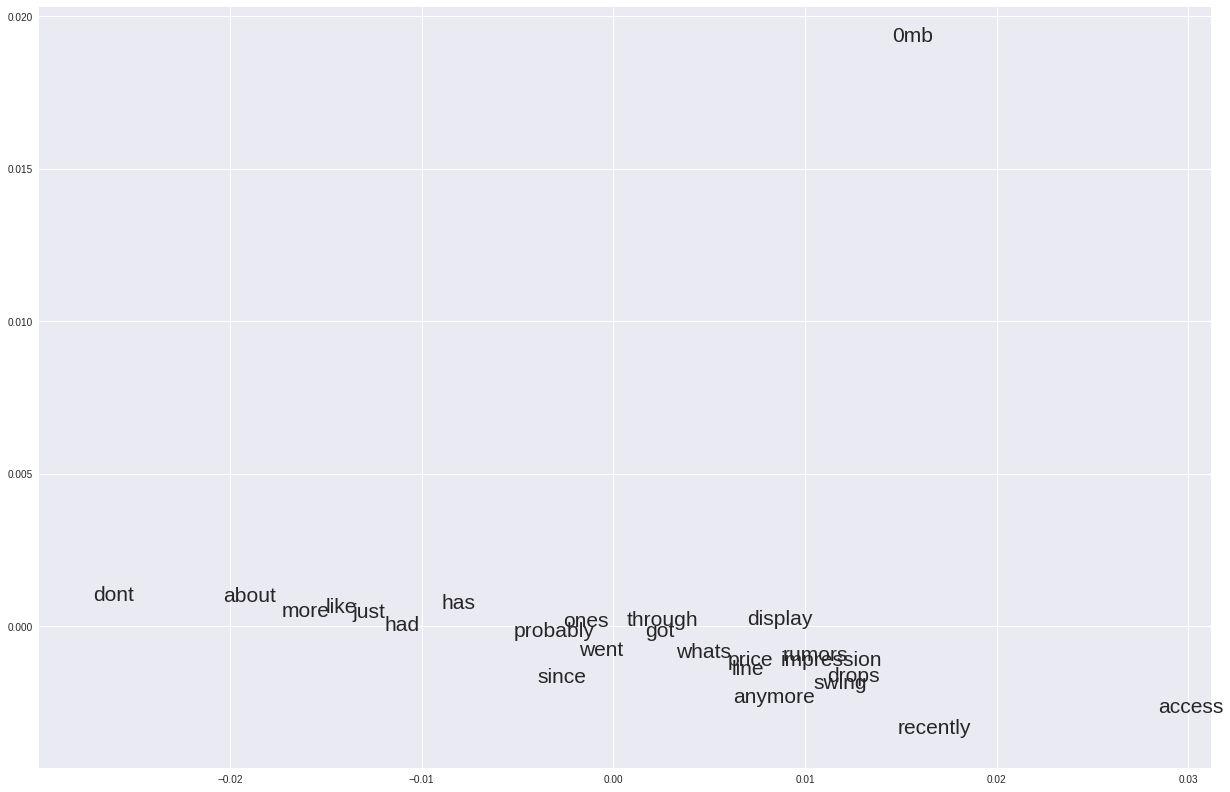

In [0]:
from sklearn.decomposition import PCA
import random

index = random.randint(0, 5000)
index = 200
words = list(w2v_model.wv.vocab.keys())[index: index+25]

pca = PCA(2)

vectors = np.array([w2v_model.wv.get_vector(w) for w in words])

transformed = pca.fit_transform(vectors)

for i, v in enumerate(transformed[:25]):
  plt.text(v[0], v[1], words[i], fontsize=21)

plt.scatter(transformed[:, 0], transformed[:, 1], s=0)
plt.gcf().set_size_inches(21, 14)

In [0]:
def get_sentence_embedding(sentence):
  
  embedding = np.zeros(300)
  
  for word in sentence.split():
    try:
      vector = w2v_model.wv.get_vector(word)
    except KeyError as e:
      vector = np.zeros(300)
    embedding += vector
    
  return embedding / len(sentence.split())
  

In [0]:
x_w2v = np.array([get_sentence_embedding(clean(sentence)) for sentence in X])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_w2v, y)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(300, )))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(len(np.unique(y)), activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


WARNING - 09:47:35: From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1300      
Total params: 94,804
Trainable params: 94,804
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Train on 8485 samples, validate on 2829 samples
Epoch 1/10
8485/8485 [==============================] - 2s 178us/step - loss: 2.9947 - acc: 0.0552 - val_loss: 2.9918 - val_acc: 0.0452
Epoch 2/10
8485/8485 [==============================] - 1s 142us/step - loss: 2.9929 - acc: 0.0532 - val_loss: 2.9923 - val_acc: 0.0452
Epoch 3/10
8485/8485 [==============================] - 1s 143us/step - loss: 2.9916 - acc: 0.0550 - val_loss: 2.9915 - val_acc: 0.0505
Epoch 4/10
8485/8485 [==============================] - 1s 142us/step - loss: 2.9911 - acc: 0.0547 - val_loss: 2.9904 - val_acc: 0.0470
Epoch 5/10
8485/8485 [==============================] - 1s 144us/step - loss: 2.9892 - acc: 0.0533 - val_loss: 2.9871 - val_acc: 0.0675
Epoch 6/10
8485/8485 [==============================] - 1s 142us/step - loss: 2.9841 - acc: 0.0651 - val_loss: 2.9756 - val_acc: 0.0693
Epoch 7/10
8485/8485 [==============================] - 1s 143us/step - loss: 2.9626 - acc: 0.0772 - val_loss: 2.9387 - val_acc: 0.0961


## LSTM with custom embeddings

Legendary blog post by Andrew Karpathy:
- http://karpathy.github.io/2015/05/21/rnn-effectiveness/


![](https://image.slidesharecdn.com/data2day2016daniel-161006141859/95/natural-language-processing-with-recurrent-neural-networks-15-638.jpg?cb=1475764680)

In [0]:
max_words = 2000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(cleaned_text)

sequences = tok.texts_to_sequences(cleaned_text)
sequences_matrix = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

In [0]:
sequences_matrix.shape

(11314, 150)

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Embedding(max_words, 50, input_length=max_len, input_shape=(max_len, )))

model.add(keras.layers.CuDNNLSTM(128)) # can be replaced with RNN or GRU
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(len(np.unique(y)), activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TypeError: ignored

In [0]:
model.fit(sequences_matrix, y, epochs=5, batch_size=32, validation_split=0.2)

In [0]:
model.layers[0].get_weights()[0][1]

In [0]:

def most_similar(word, weights, amount=10):
  index = tok.word_index[word]
  
  try:
    embedding = weights[index].reshape(1, -1)
  except:
    embedding = weights[0].reshape(1, -1)
  
  sims = cosine_similarity(embedding, weights).ravel()

  indices = np.argsort(sims)[::-1][1:amount+1]
  return [(tok.index_word[i], sims[i]) for i in indices.ravel()]

In [0]:
embedding_layer = model.layers[0].get_weights()[0]

most_similar('man', embedding_layer)

Note that these may or may not mean anything to us. It's what the network decided to learn about these words. Word2Vec can give us semantically similar words because it was trained that way.